# Introduction to Monte Carlo Simulation in Finance

## A Simple Example of Path Generation in R

### Plotting Returns

We read a csv file which contains some raw data on the S&P MIB Index

In [10]:
options(warn=-1)
require(binhf)

file_name = paste(getwd(),'data', 'ts_sp_mib.csv', sep="/")
ts <- read.csv(file_name, sep=';')
ts$Date = as.Date(ts$Date)

attach(ts)

The following objects are masked from ts (pos = 3):

    Date, Price

The following objects are masked from ts (pos = 9):

    Date, Price



To calculate returns without any loops, we shift price array of a single position, and then calculate the logarithm of the ratio, in this way we obtain directly the yields array:

$$yield = \ln\Bigl({P_{t-1} \over P_{t}}\Bigr)$$

In [11]:
shift_price    <- shift(Price,1)
shift_price[1] <- 0
yield <- log(shift_price/Price)
yield[1] <- 0

And now I can plot a histogram of *yield*  and add a *curve()* function to the plot using the mean and standard deviation of *yield* as the parameters. The *curve()* function takes as its first parameter a function itself (or an expression) that must be written as some function of *x*.  Our function here is *dnorm()*. The *x* in the *dnorm()* function is not an object we have created; rather, it’s indicating that there’s a variable that is being evaluated, and the evaluation is the normal density at the mean of *yield* and standard deviation of *yield*. Make sure to include add=TRUE so that the curve is plotted on the same plot as the histogram.  Here is what we get:

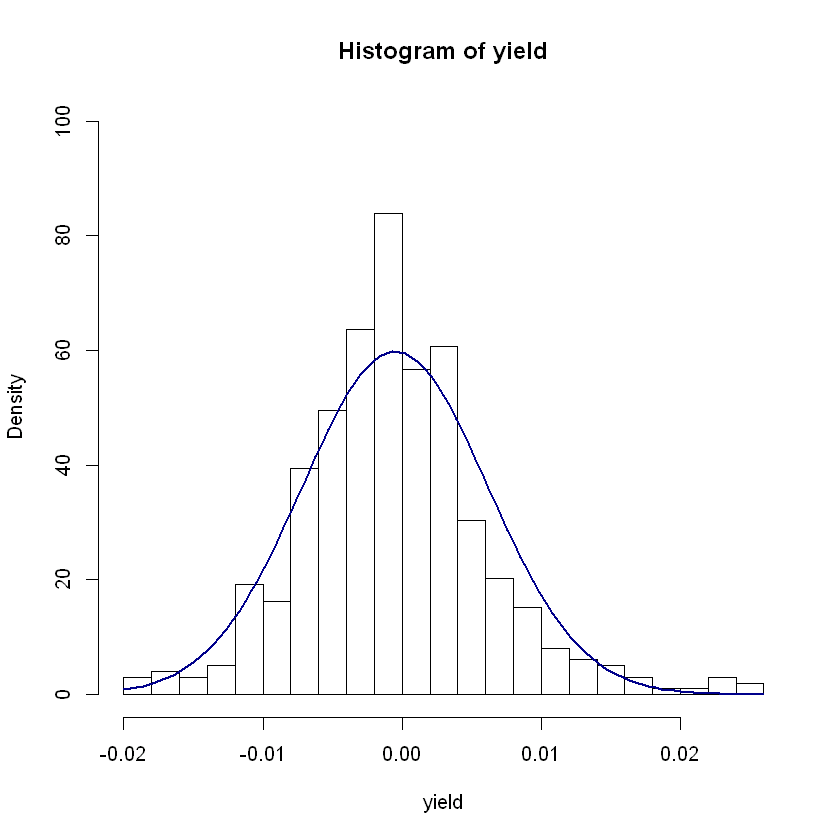

In [12]:
hist(yield, prob=TRUE, ylim=c(0,100), breaks=20)
curve(dnorm(x, mean(yield), sd(yield)), add=TRUE, col="darkblue", lwd=2)

## Simulating Some Trajectories

The following function simulates a trajectory of Brownian motion at time instants *tt*

In [13]:
wiener = function( n, tt ) {
  e = rnorm( n, 0, 1 )
  x = c(0,cumsum( e )) / sqrt(n)
  return(x)
}

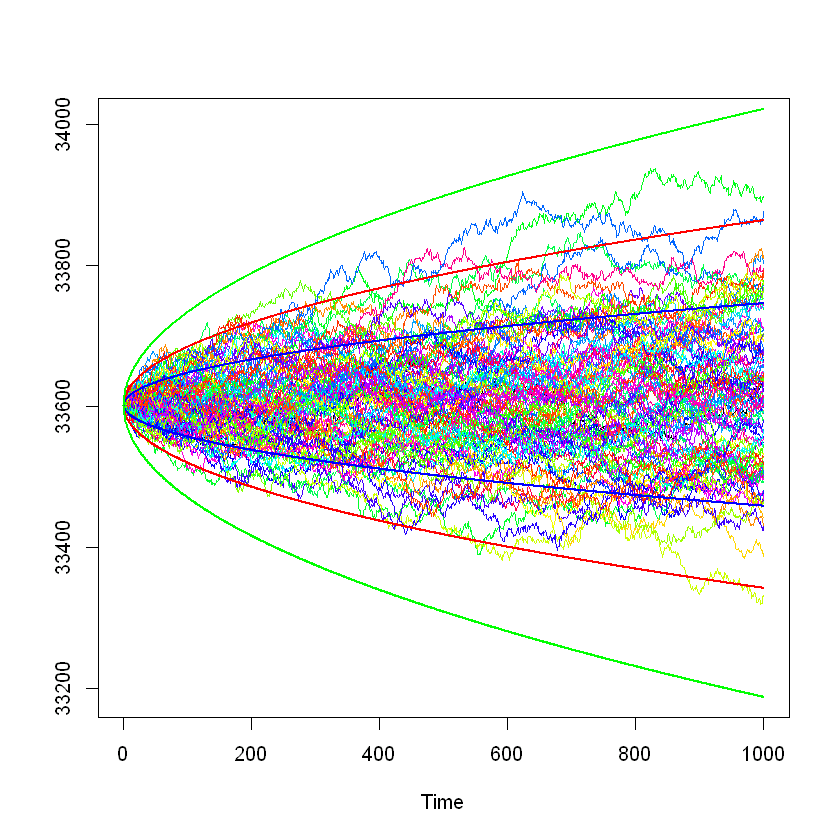

In [14]:
time_step  <- 1000
nsim       <- 100
t          <- seq(0,1,1/time_step)
delta_t    <- t[2]-t[1]

m          <- mean(yield)
s          <- sd(yield)

# volatility
sigma   <- s * sqrt(250) * sqrt(delta_t)
# drift 
drift   <- (m + .5*sigma*sigma)*delta_t

paths   <- wiener(time_step, t )  
S0      <- Price[length(Price)]
S1      <- S0*exp(drift + sigma * paths)

lower = 0.99*min(S1)
upper = 1.01*max(S1)

plot( S1, type="l",ylim = c(lower,upper), xlab = "Time", ylab="" )
for(i in 1:nsim){
    paths <- wiener(time_step, t )  
    S     <- S0*exp(drift + sigma * paths)
    lines( S , col=sample(rainbow(100)))
}

# Adding confidence level curve

# 90-th percentile
p <- qnorm(0.9)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='blue')
lines(y2, lwd=2,col='blue')

# 99-th percentile
p <- qnorm(0.99)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='red')
lines(y2, lwd=2,col='red')

# 99.99-th percentile
p <- qnorm(0.9999)
y1=S0*exp(drift+p*sigma*sqrt(t))
y2=S0*exp(drift-p*sigma*sqrt(t))
lines(y1, lwd=2,col='green')
lines(y2, lwd=2,col='green')
